In [14]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Suppress potential registration errors for CUDA
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [15]:
import io
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

# Ensure reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Suppress potential OpenCV and PIL warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='PIL')

In [16]:
from collections import Counter

X_train = []
Y_train = []

image_size = 150

labels = ['Alluvial soil', 'Black Soil', 'Clay soil', 'Red soil']

# Dictionary to store counts of each label
label_counts = {label: 0 for label in labels}

# Process training images
for label in labels:
    folderPath = os.path.join('C:/Users/abhis/Downloads/crop7/Dataset/Train', label)
    for filename in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, filename))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(label)
        label_counts[label] += 1

# Process test images
for label in labels:
    folderPath = os.path.join('C:/Users/abhis/Downloads/crop7/Dataset/test', label)
    for filename in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, filename))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(label)
        label_counts[label] += 1

# Print each label with its count
for label, count in label_counts.items():
    print(f"{label}: {count}")

X_train = np.array(X_train)
Y_train = np.array(Y_train)


Alluvial soil: 576
Black Soil: 344
Clay soil: 262
Red soil: 373


In [17]:
# Shuffle the training data and labels
X_train, Y_train = shuffle(X_train, Y_train, random_state=101)

# Check the shape of the training data
print("Shuffled training data shape:", X_train.shape)

Shuffled training data shape: (1555, 150, 150, 3)


In [18]:
print("Number of samples in the training data:", len(X_train))


Number of samples in the training data: 1555


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.1, random_state=101)

# Display the shape of the train and test sets
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (1399, 150, 150, 3)
Test data shape: (156, 150, 150, 3)
Training labels shape: (1399,)
Test labels shape: (156,)


In [20]:
print(y_train)


['Clay soil' 'Alluvial soil' 'Red soil' ... 'Alluvial soil' 'Black Soil'
 'Red soil']


In [21]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train,num_classes=4)

# Encode y_test labels
y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
    print(y_test_new)
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test,num_classes=4)

[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 2]
[0, 1, 2, 2, 1]
[0, 1, 2, 2, 1, 2]
[0, 1, 2, 2, 1, 2, 2]
[0, 1, 2, 2, 1, 2, 2, 0]
[0, 1, 2, 2, 1, 2, 2, 0, 0]
[0, 1, 2, 2, 1, 2, 2, 0, 0, 1]
[0, 1, 2, 2, 1, 2, 2, 0, 0, 1, 2]
[0, 1, 2, 2, 1, 2, 2, 0, 0, 1, 2, 0]
[0, 1, 2, 2, 1, 2, 2, 0, 0, 1, 2, 0, 3]
[0, 1, 2, 2, 1, 2, 2, 0, 0, 1, 2, 0, 3, 2]
[0, 1, 2, 2, 1, 2, 2, 0, 0, 1, 2, 0, 3, 2, 2]
[0, 1, 2, 2, 1, 2, 2, 0, 0, 1, 2, 0, 3, 2, 2, 3]
[0, 1, 2, 2, 1, 2, 2, 0, 0, 1, 2, 0, 3, 2, 2, 3, 2]
[0, 1, 2, 2, 1, 2, 2, 0, 0, 1, 2, 0, 3, 2, 2, 3, 2, 0]
[0, 1, 2, 2, 1, 2, 2, 0, 0, 1, 2, 0, 3, 2, 2, 3, 2, 0, 3]
[0, 1, 2, 2, 1, 2, 2, 0, 0, 1, 2, 0, 3, 2, 2, 3, 2, 0, 3, 1]
[0, 1, 2, 2, 1, 2, 2, 0, 0, 1, 2, 0, 3, 2, 2, 3, 2, 0, 3, 1, 0]
[0, 1, 2, 2, 1, 2, 2, 0, 0, 1, 2, 0, 3, 2, 2, 3, 2, 0, 3, 1, 0, 3]
[0, 1, 2, 2, 1, 2, 2, 0, 0, 1, 2, 0, 3, 2, 2, 3, 2, 0, 3, 1, 0, 3, 1]
[0, 1, 2, 2, 1, 2, 2, 0, 0, 1, 2, 0, 3, 2, 2, 3, 2, 0, 3, 1, 0, 3, 1, 2]
[0, 1, 2, 2, 1, 2, 2, 0, 0, 1, 2, 0, 3, 2, 2, 3, 2, 0, 3, 1, 0, 3, 1, 2, 0]


In [22]:
y_train


array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [23]:
print(y_test)


[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0.

In [24]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

# #Scaling 
# def process(image,label):
#     image = tensorflow.cast(image/255. ,tensorflow.float32)
#     return image,label

# train_ds = train_ds.map(process)
# validation_ds = validation_ds.map(process)


#Generators=Dividing the dataset into the smaller chucks for the models
train_ds= train_datagen.flow(
        X_train, y_train, batch_size=32,
)

validation_ds = validation_datagen.flow(
        X_test, y_test, batch_size=32,)

In [25]:
validation_ds


In [26]:
from keras.applications.vgg16 import VGG16

conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(256,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [27]:
conv_base.trainable = False


In [28]:
conv_base.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [29]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 19041860 (72.64 MB)
Trainable params: 4327

In [30]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])


In [38]:
history = model.fit(
    train_ds,
    epochs = 10,
    validation_data = validation_ds,
    )

Epoch 1/10
44/44 [==============================] - 152s 3s/step - loss: 0.9829 - accuracy: 0.5840 - val_loss: 0.6941 - val_accuracy: 0.7179
Epoch 2/10
44/44 [==============================] - 274s 6s/step - loss: 0.6116 - accuracy: 0.7684 - val_loss: 0.5056 - val_accuracy: 0.7692
Epoch 3/10
44/44 [==============================] - 134s 3s/step - loss: 0.5240 - accuracy: 0.8041 - val_loss: 0.5358 - val_accuracy: 0.7692
Epoch 4/10
44/44 [==============================] - 231s 5s/step - loss: 0.4000 - accuracy: 0.8599 - val_loss: 0.4628 - val_accuracy: 0.8077
Epoch 5/10
44/44 [==============================] - 141s 3s/step - loss: 0.3447 - accuracy: 0.8771 - val_loss: 0.4244 - val_accuracy: 0.8205
Epoch 6/10
44/44 [==============================] - 191s 4s/step - loss: 0.3286 - accuracy: 0.8735 - val_loss: 0.3342 - val_accuracy: 0.8718
Epoch 7/10
44/44 [==============================] - 161s 4s/step - loss: 0.2798 - accuracy: 0.8971 - val_loss: 0.3386 - val_accuracy: 0.8782
Epoch 8/10
44

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns  

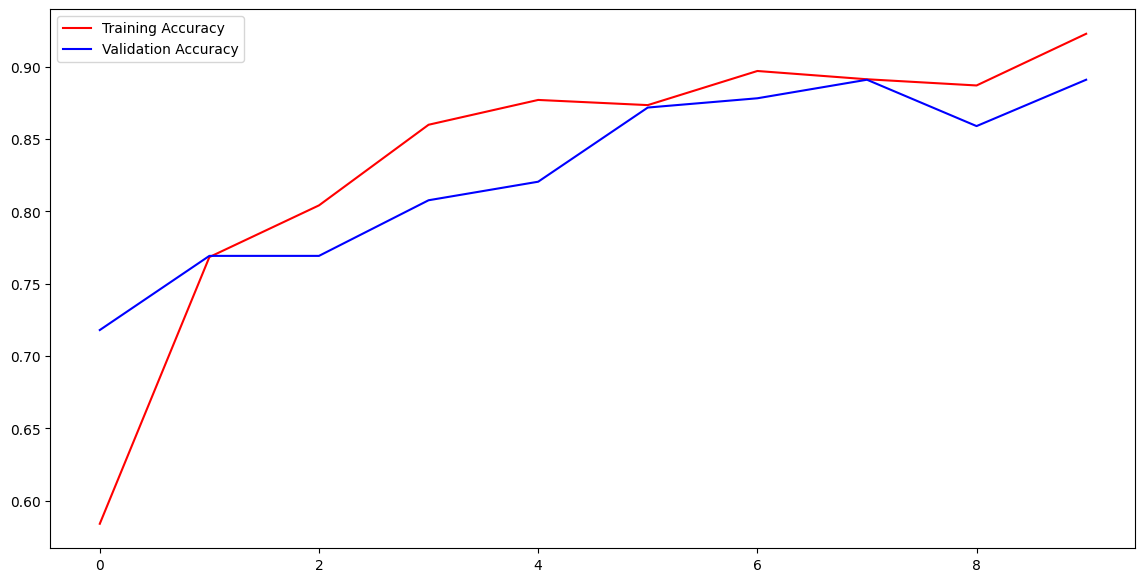

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

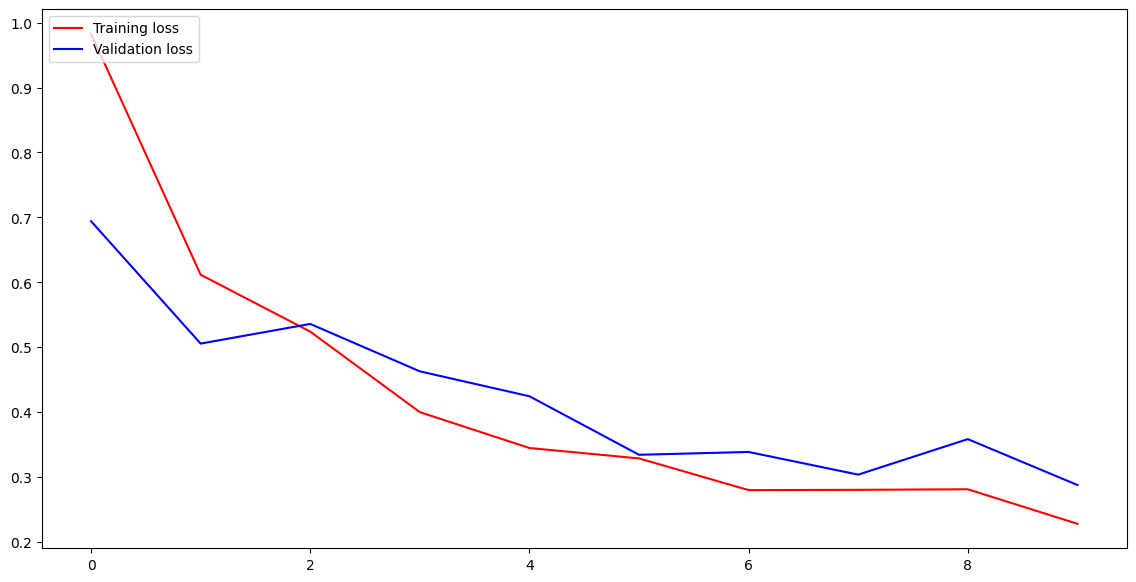

In [41]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [42]:
image_path="C:/Users/abhis/Downloads/crop7/Dataset/test/Red soil/Copy of download (1).jpg"
img = cv2.imread(image_path)
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [43]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

Selected image: C:/Users/abhis/Downloads/crop7/Dataset/test/Alluvial soil\photo_2022-06-01_07-09-46.jpg


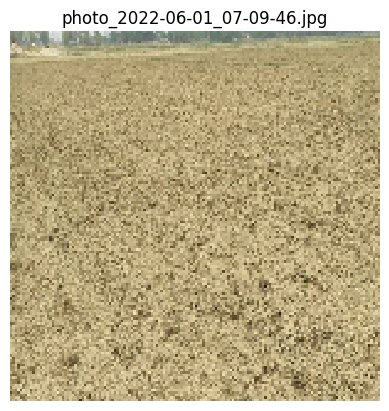

Original image shape: (150, 150, 3)
Expanded image shape: (1, 150, 150, 3)
Normalized image shape: (1, 150, 150, 3)
1/1 [==============================] - 0s 231ms/step
Prediction array: [[9.7010809e-01 1.9652494e-03 2.4328855e-04 2.7683333e-02]]
Predicted class index: 0
Soil Type: Alluvial soil
{This soil is suitable for crops: Rice, SugarCane, Maize, Cotton, Soyabean, Jute}


In [44]:
import random
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os 

# Define your base image directory
base_directory = 'C:/Users/abhis/Downloads/crop7/Dataset/test/Black Soil'

# Define the subdirectories
subdirectories = ['C:/Users/abhis/Downloads/crop7/Dataset/test/Alluvial soil', 'C:/Users/abhis/Downloads/crop7/Dataset/test/Red soil', 'C:/Users/abhis/Downloads/crop7/Dataset/test/Black Soil', 'C:/Users/abhis/Downloads/crop7/Dataset/test/Clay soil']

# List all image files in all subdirectories
all_image_files = []
for subdir in subdirectories:
    directory = os.path.join(base_directory, subdir)
    files = os.listdir(directory)
    image_files = [os.path.join(directory, f) for f in files if f.endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
    all_image_files.extend(image_files)

# Select a random image file from the combined list
random_file = random.choice(all_image_files)
print(f"Selected image: {random_file}")  # Debug print to check the selected image path

# Load the randomly selected image using keras.preprocessing.image.load_img
img = image.load_img(random_file, target_size=(150, 150))  # Adjust target_size to (150, 150)

# Display the image using matplotlib
plt.imshow(img, interpolation='nearest')
plt.axis("off")  # Remove axis labels and ticks
plt.title(os.path.basename(random_file))  # Optional: Display filename as title
plt.show()

# Preprocess the image
img_array = image.img_to_array(img)  # Convert the image to a numpy array
print(f"Original image shape: {img_array.shape}")  # Debug print to check the shape

img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match the model's input shape
print(f"Expanded image shape: {img_array.shape}")  # Debug print to check the shape

img_array = img_array / 255.0  # Normalize pixel values to [0, 1]
print(f"Normalized image shape: {img_array.shape}")  # Debug print to check the shape

# Predict the class of the image
a = model.predict(img_array)
print(f"Prediction array: {a}")  # Debug print to check the prediction output

indices = a.argmax()
print(f"Predicted class index: {indices}")  # Debug print to check the predicted index

labels = ["Alluvial soil", "Black Soil", "Clay soil", "Red soil"]  # Your label definitions

soil = {
    "Alluvial soil": "{This soil is suitable for crops: Rice, SugarCane, Maize, Cotton, Soyabean, Jute}",
    "Black Soil": "{This soil is suitable for crops: Wheat, Virginia, Jowar, Millets, Linseed, Castor, Sunflower}",
    "Clay soil": "{This soil is suitable for crops: Rice, Lettuce, Chard, Broccoli, Cabbage, Snap, Beans}",
    "Red soil": "{This soil is suitable for crops: Cotton, Pulses, Millets, OilSeeds, Potatoes}",
}

if labels[indices] in soil.keys():
    print("Soil Type:", labels[indices])
    print(soil[labels[indices]])

In [45]:
# Ensure labels are defined correctly and match the keys in the soil dictionary
labels = ['Alluvial soil', 'Black soil', 'Clay soil', 'Red soil']

# Preprocess the image
img_array = image.img_to_array(img)  # Convert the image to a numpy array
img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match the model's input shape
img_array = img_array / 255.0  # Normalize pixel values to [0, 1]

# Predict the class of the image
a = model.predict(img_array)

# Debugging print statements
print("Prediction array:", a)

indices = a.argmax()

# Debugging print statement
print("Predicted index:", indices)

soil = {
    "Alluvial soil": "{This soil is suitable for crops: Rice, SugarCane, Maize, Cotton, Soyabean, Jute}",
    "Black Soil": "{This soil is suitable for crops: Wheat, Virginia, Jowar, Millets, Linseed, Castor, Sunflower}",
    "Clay soil": "{This soil is suitable for crops: Rice, Lettuce, Chard, Broccoli, Cabbage, Snap, Beans}",
    "Red soil": "{This soil is suitable for crops: Cotton, Pulses, Millets, OilSeeds, Potatoes}",
}

predicted_label = labels[indices]

# Debugging print statement
print("Predicted label:", predicted_label)

if predicted_label in soil.keys():
    print("Soil Type:", predicted_label)
    print(soil[predicted_label])
else:
    print("Predicted label not found in soil dictionary")


1/1 [==============================] - 0s 159ms/step
Prediction array: [[9.7010809e-01 1.9652494e-03 2.4328855e-04 2.7683333e-02]]
Predicted index: 0
Predicted label: Alluvial soil
Soil Type: Alluvial soil
{This soil is suitable for crops: Rice, SugarCane, Maize, Cotton, Soyabean, Jute}


In [46]:
import joblib

# Save the model
joblib.dump(model, 'crop_recommendation_model.pkl')


['crop_recommendation_model.pkl']

In [47]:
# Save label encoders
import numpy as np
import joblib
from sklearn.preprocessing import LabelEncoder
joblib.dump(label_encoder_soil, 'label_encoder_soil.pkl')
joblib.dump(label_encoder_crop, 'label_encoder_crop.pkl')

# Load label encoders
label_encoder_soil = joblib.load('label_encoder_soil.pkl')
label_encoder_crop = joblib.load('label_encoder_crop.pkl')


In [79]:
# # Ensure labels are defined correctly and match the keys in the soil dictionary
# labels = ['Clay Soil', 'Black Soil', 'Alluvial Soil', 'Red Soil']

# # Preprocess the image
# img_array = image.img_to_array(img)  # Convert the image to a numpy array
# img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match the model's input shape
# img_array = img_array / 255.0  # Normalize pixel values to [0, 1]

# # Predict the class of the image and the values of N, P, K
# predictions = model.predict(img_array)

# # Debugging print statements
# print("Prediction array shape:", predictions.shape)
# print("Prediction array:", predictions)

# # Assuming the last 3 values are N, P, K values, and the rest are soil type predictions
# num_soil_types = len(labels)
# num_npk_values = 3

# # Check if predictions have enough values
# if predictions.shape[1] >= (num_soil_types + num_npk_values):
#     soil_predictions = predictions[0][:num_soil_types]
#     n_p_k_values = predictions[0][num_soil_types:num_soil_types + num_npk_values]

#     indices = np.argmax(soil_predictions)

#     # Debugging print statements
#     print("Predicted soil predictions:", soil_predictions)
#     print("Predicted N, P, K values:", n_p_k_values)

#     predicted_label = labels[indices]

#     if predicted_label in soil.keys():
#         print("Soil Type:", predicted_label)
#         print(soil[predicted_label])
#         # Print the values of N, P, K
#         print("N (Nitrogen):", n_p_k_values[0])
#         print("P (Phosphorus):", n_p_k_values[1])
#         print("K (Potassium):", n_p_k_values[2])
#     else:
#         print("Predicted label not found in soil dictionary")
# else:
#     print("Prediction array does not contain enough values.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 856ms/step
Prediction array shape: (1, 4)
Prediction array: [[9.9621445e-01 1.3802452e-03 2.3511173e-03 5.4091379e-05]]
Prediction array does not contain enough values.


In [48]:
import pandas as pd

# Load the dataset
fertilizer_data = pd.read_csv('C:/Users/abhis/Downloads/soil/Fertilizer Prediction.csv')

# Print column names to check for any discrepancies
print(fertilizer_data.columns)


Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')


In [49]:
import pandas as pd

# Load the dataset
fertilizer_data = pd.read_csv('C:/Users/abhis/Downloads/soil/Fertilizer Prediction.csv')

# Rename columns to remove extra spaces and characters
fertilizer_data.columns = fertilizer_data.columns.str.strip()  # Remove leading/trailing spaces

# Verify the column names
print(fertilizer_data.columns)


Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Encode categorical features
label_encoder_soil = LabelEncoder()
label_encoder_crop = LabelEncoder()
fertilizer_data['Soil Type Encoded'] = label_encoder_soil.fit_transform(fertilizer_data['Soil Type'])
fertilizer_data['Crop Type Encoded'] = label_encoder_crop.fit_transform(fertilizer_data['Crop Type'])

# Define features and target
features = fertilizer_data[['Temparature', 'Humidity', 'Moisture', 'Soil Type Encoded', 'Crop Type Encoded', 'Nitrogen', 'Potassium', 'Phosphorous']]
target = fertilizer_data['Fertilizer Name']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the model
recommendation_model = RandomForestClassifier()
recommendation_model.fit(X_train, y_train)

# Evaluate the model
accuracy = recommendation_model.score(X_test, y_test)
print(f"Recommendation Model Accuracy: {accuracy*100}")


Recommendation Model Accuracy: 100.0


In [51]:
print("Soil Type Classes:", label_encoder_soil.classes_)
print("Crop Type Classes:", label_encoder_crop.classes_)


Soil Type Classes: ['Black' 'Clayey' 'Loamy' 'Red' 'Sandy']
Crop Type Classes: ['Barley' 'Cotton' 'Ground Nuts' 'Maize' 'Millets' 'Oil seeds' 'Paddy'
 'Pulses' 'Sugarcane' 'Tobacco' 'Wheat']


In [54]:
import numpy as np

# Example feature values (replace with actual values)
# Example feature values (replace with actual values)
# Example feature values (replace with actual values)
image_features = {
    'Temperature': 27,
    'Humidity': 92,
    'Moisture': 40,
    'Soil Type':"Black" ,  # Use correct soil type
    'Crop Type': 'Sugarcane',  # Use correct crop type
    'Nitrogen': 13,
    'Potassium': 2,
    'Phosphorous': 30
}

# Encode the soil type and crop type
soil_type_encoded = label_encoder_soil.transform([image_features['Soil Type']])[0]
crop_type_encoded = label_encoder_crop.transform([image_features['Crop Type']])[0]

# Prepare feature vector for prediction
new_features = np.array([[image_features['Temperature'], image_features['Humidity'],
                          image_features['Moisture'], soil_type_encoded, crop_type_encoded,
                          image_features['Nitrogen'], image_features['Potassium'], image_features['Phosphorous']]])

# Predict the fertilizer
recommended_fertilizer = recommendation_model.predict(new_features)
print(f"Recommended Fertilizer: {recommended_fertilizer[0]}")




Recommended Fertilizer: 20-20


C:\Users\abhis\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [55]:
import joblib

# Assuming `recommendation_model` is your trained model
joblib.dump(recommendation_model, 'fertilizer_recommendation_model.pkl')


['fertilizer_recommendation_model.pkl']

In [11]:
import joblib

# Assuming `recommendation_model` is your trained model
joblib.dump(recommendation_model, 'fertilizer_recommendation_model.pkl')


['fertilizer_recommendation_model.pkl']

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Example of creating a simple Keras model
model = Sequential([
    Dense(64, activation='relu', input_shape=(10,)),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

# Save the Keras model
model.save('fertilizer_recommendation_model.h5')


c:\Users\abhis\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
import tensorflow as tf

# Load the Keras model
recommendation_model = tf.keras.models.load_model('fertilizer_recommendation_model.h5')


In [68]:
# import numpy as np
# import joblib
# from sklearn.preprocessing import LabelEncoder

# # Assuming this is the predicted label from crop_recommendation_model.pkl
# predicted_label = "Black soil"

# # Extract only the first word from the predicted label (e.g., "Black soil" -> "Black")
# soil_type = predicted_label.split()[0]

# # Load the fertilizer recommendation model
# recommendation_model = joblib.load('fertilizer_recommendation_model.pkl')

# # Load label encoders
# label_encoder_soil = joblib.load('label_encoder_soil.pkl')
# label_encoder_crop = joblib.load('label_encoder_crop.pkl')

# # Example feature values with the updated soil type
# image_features = {
#     'Temperature': 36,
#     'Humidity': 54,
#     'Moisture': 46,
#     'Soil Type': soil_type,  # Use the predicted soil type (e.g., "Black")
#     'Crop Type': 'Maize',    # Replace with actual crop type if needed
#     'Nitrogen': 31,
#     'Potassium': 0,
#     'Phosphorous': 14
# }

# # Encode the soil type and crop type
# soil_type_encoded = label_encoder_soil.transform([image_features['Soil Type']])[0]
# crop_type_encoded = label_encoder_crop.transform([image_features['Crop Type']])[0]

# # Prepare feature vector for prediction
# new_features = np.array([[image_features['Temperature'], image_features['Humidity'],
#                           image_features['Moisture'], soil_type_encoded, crop_type_encoded,
#                           image_features['Nitrogen'], image_features['Potassium'], image_features['Phosphorous']]])

# # Predict the fertilizer
# recommended_fertilizer = recommendation_model.predict(new_features)
# print(f"Recommended Fertilizer: {recommended_fertilizer[0]}")


Recommended Fertilizer: Urea


C:\Users\abhis\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [57]:
import numpy as np
import joblib
from keras.preprocessing import image
from keras.models import load_model

# Load the crop recommendation model
crop_recommendation_model = joblib.load('crop_recommendation_model.pkl')

# Print the expected input shape of the model
input_shape = crop_recommendation_model.input_shape  # This will give you the input shape
print(f"Expected input shape: {input_shape}")

# Preprocess the input image using the correct target size
img = image.load_img('C:/Users/abhis/Downloads/crop7/Dataset/test/Red soil/Copy of download.jpg', target_size=input_shape[1:3])
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize the image

# Predict the soil type
predicted_label = crop_recommendation_model.predict(img_array)

# Assuming the model outputs probabilities for each class, get the class with the highest probability
predicted_class_index = np.argmax(predicted_label)

# Load the class labels (this should be a list of soil types corresponding to the model's output classes)
class_labels = ['Alluvial Soil', 'Black Soil', 'Clayey Soil', 'Red Soil']  # Example class labels, replace with your actual class labels

# Get the predicted soil type
soil_type = class_labels[predicted_class_index]
print(f"Predicted soil type: {soil_type}")

# Load the fertilizer recommendation model
recommendation_model = joblib.load('fertilizer_recommendation_model.pkl')

# Load label encoders
label_encoder_soil = joblib.load('label_encoder_soil.pkl')
label_encoder_crop = joblib.load('label_encoder_crop.pkl')

# Example feature values with the updated soil type
image_features = {
    'Temperature': 36,
    'Humidity': 54,
    'Moisture': 46,
    'Soil Type': soil_type,  # Use the predicted soil type (e.g., "Black")
    'Crop Type': 'Maize',    # Replace with actual crop type if needed
    'Nitrogen': 31,
    'Potassium': 0,
    'Phosphorous': 14
}

# Encode the soil type and crop type
soil_type_encoded = label_encoder_soil.transform([image_features['Soil Type']])[0]
crop_type_encoded = label_encoder_crop.transform([image_features['Crop Type']])[0]

# Prepare feature vector for prediction
new_features = np.array([[image_features['Temperature'], image_features['Humidity'],
                          image_features['Moisture'], soil_type_encoded, crop_type_encoded,
                          image_features['Nitrogen'], image_features['Potassium'], image_features['Phosphorous']]])

# Predict the fertilizer
recommended_fertilizer = recommendation_model.predict(new_features)
print(f"Recommended Fertilizer: {recommended_fertilizer[0]}")


Expected input shape: (None, 150, 150, 3)
1/1 [==============================] - 0s 378ms/step
Predicted soil type: Red Soil
Recommended Fertilizer: Urea


C:\Users\abhis\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [60]:
# import requests
# from geopy.geocoders import Nominatim

# # Replace with your actual WeatherAPI key
# API_KEY = '0f91ae25d6064ac3a1e182218242908'
# BASE_URL = 'http://api.weatherapi.com/v1/current.json'

# # Function to get current location (latitude and longitude)
# def get_current_location():
#     # Use an IP geolocation service to get your current location
#     response = requests.get('https://ipinfo.io')
#     if response.status_code == 200:
#         data = response.json()
#         loc = data['loc'].split(',')
#         latitude = loc[0]
#         longitude = loc[1]
#         return latitude, longitude
#     else:
#         print("Unable to get location.")
#         return None, None

# # Function to get weather data based on coordinates
# def get_weather(latitude, longitude):
#     # Constructing the request URL
#     request_url = f"{BASE_URL}?key={API_KEY}&q={latitude},{longitude}"
    
#     # Sending the request to the WeatherAPI
#     response = requests.get(request_url)
    
#     # Checking if the request was successful
#     if response.status_code == 200:
#         # Parsing the JSON response
#         weather_data = response.json()
        
#         # Extracting temperature, humidity, and other information
#         temperature = weather_data['current']['temp_c']
#         humidity = weather_data['current']['humidity']
#         moisture = weather_data['current']['precip_mm']  # Precipitation as a proxy for moisture
        
#         # Getting human-readable address
#         geolocator = Nominatim(user_agent="geoapiExercises")
#         location = geolocator.reverse(f"{latitude}, {longitude}")
        
#         # Printing the weather data
#         print(f"Location: {location.address}")
#         print(f"Temperature: {temperature}°C")
#         print(f"Humidity: {humidity}%")
#         print(f"Moisture (Precipitation): {moisture} mm")
#     else:
#         print(f"Failed to retrieve weather data. Status code: {response.status_code}")

# # Main function to get location and weather data
# def main():
#     latitude, longitude = get_current_location()
#     if latitude and longitude:
#         get_weather(latitude, longitude)

# # Execute the main function
# if __name__ == "__main__":
#     main()

GeocoderInsufficientPrivileges: Non-successful status code 403

In [62]:
import requests
import numpy as np
import joblib
from geopy.geocoders import Nominatim
from keras.preprocessing import image
from keras.models import load_model

# Replace with your actual WeatherAPI key
API_KEY = '0f91ae25d6064ac3a1e182218242908'
BASE_URL = 'http://api.weatherapi.com/v1/current.json'

# Function to get current location (latitude and longitude)
def get_current_location():
    # Use an IP geolocation service to get your current location
    response = requests.get('https://ipinfo.io')
    if response.status_code == 200:
        data = response.json()
        loc = data['loc'].split(',')
        latitude = loc[0]
        longitude = loc[1]
        return latitude, longitude
    else:
        print("Unable to get location.")
        return None, None

# Function to get weather data based on coordinates
def get_weather(latitude, longitude):
    # Constructing the request URL
    request_url = f"{BASE_URL}?key={API_KEY}&q={latitude},{longitude}"
    
    # Sending the request to the WeatherAPI
    response = requests.get(request_url)
    
    # Checking if the request was successful
    if response.status_code == 200:
        # Parsing the JSON response
        weather_data = response.json()
        
        # Extracting temperature, humidity, and moisture
        temperature = weather_data['current']['temp_c']
        humidity = weather_data['current']['humidity']
        moisture = weather_data['current']['precip_mm']  # Precipitation as a proxy for moisture
        
        return temperature, humidity, moisture
    else:
        print(f"Failed to retrieve weather data. Status code: {response.status_code}")
        return None, None, None

# Main function to handle prediction and fertilizer recommendation
def main():
    # Step 1: Get current location
    latitude, longitude = get_current_location()
    if not (latitude and longitude):
        return
    
    # Step 2: Get weather data
    temperature, humidity, moisture = get_weather(latitude, longitude)
    if not (temperature and humidity and moisture):
        return
    
    # Step 3: Load the crop recommendation model and predict soil type from an image
    crop_recommendation_model = joblib.load('crop_recommendation_model.pkl')
    
    img = image.load_img('C:/Users/abhis/Downloads/crop7/Dataset/test/Red soil/Copy of annamalai-red-soil-suppliers-kotturpuram-chennai-red-soil-dealers-ey0ylh5r3e.jpg',
                         target_size=crop_recommendation_model.input_shape[1:3])  # Adjust as needed
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize the image
    
    # Predict the soil type
    predicted_label = crop_recommendation_model.predict(img_array)
    
    # Assuming the model outputs probabilities for each class, get the class with the highest probability
    predicted_class_index = np.argmax(predicted_label)
    
    # List of soil types corresponding to the model's output classes
    soil_types = ['Alluvial Soil', 'Black Soil', 'Clayey', 'Red Soil']  # Update this list with your actual labels
    
    # Get the predicted soil type
    soil_type = soil_types[predicted_class_index]
    print(f"Predicted Soil Type: {soil_type}")
    
    # Step 4: Load the fertilizer recommendation model and make predictions
    recommendation_model = joblib.load('fertilizer_recommendation_model.pkl')
    
    # Load label encoders
    label_encoder_soil = joblib.load('label_encoder_soil.pkl')
    label_encoder_crop = joblib.load('label_encoder_crop.pkl')
    
    # Example feature values with the updated soil type and weather data
    image_features = {
        'Temperature': temperature,
        'Humidity': humidity,
        'Moisture': moisture,
        'Soil Type': soil_type,  # Use the predicted soil type
        'Crop Type': 'Maize',    # Replace with actual crop type if needed
        'Nitrogen': 31,
        'Potassium': 0,
        'Phosphorous': 14
    }
    print(temperature, humidity, moisture)
    
    # Encode the soil type and crop type
    soil_type_encoded = label_encoder_soil.transform([image_features['Soil Type']])[0]
    crop_type_encoded = label_encoder_crop.transform([image_features['Crop Type']])[0]
    
    # Prepare feature vector for prediction
    new_features = np.array([[image_features['Temperature'], image_features['Humidity'],
                              image_features['Moisture'], soil_type_encoded, crop_type_encoded,
                              image_features['Nitrogen'], image_features['Potassium'], image_features['Phosphorous']]])
    
    # Predict the fertilizer
    recommended_fertilizer = recommendation_model.predict(new_features)
    print(f"Recommended Fertilizer: {recommended_fertilizer[0]}")

# Execute the main function
if __name__ == "__main__":
    main()


1/1 [==============================] - 0s 486ms/step
Predicted Soil Type: Alluvial Soil
28.1 84 0.44
Recommended Fertilizer: Urea


C:\Users\abhis\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [63]:
import numpy as np
import joblib
from keras.preprocessing import image
from keras.models import load_model

# Load the crop recommendation model
crop_recommendation_model = joblib.load('crop_recommendation_model.pkl')

# Define the class labels (ensure this matches the order used during training)
class_labels = ['Alluvial Soil', 'Black Soil', 'Clay soil', 'Red soil']

# Preprocess the input image
input_shape = crop_recommendation_model.input_shape  # Get model's input shape
img = image.load_img('C:/Users/abhis/Downloads/crop7/Dataset/Train/Black Soil/Black_13.jpg', target_size=input_shape[1:3])
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize the image

# Predict the soil type
predicted_label = crop_recommendation_model.predict(img_array)

# Print the raw prediction output for debugging
print(f"Raw model prediction output: {predicted_label}")

# Get the class index with the highest probability
predicted_class_index = np.argmax(predicted_label)
print(f"Predicted class index: {predicted_class_index}")

# Get the predicted soil type
predicted_soil_type = class_labels[predicted_class_index]
print(f"Predicted soil type: {predicted_soil_type}")

# Define the soil dictionary
soil_dict = {
    "Alluvial soil": "This soil is suitable for crops: Rice, SugarCane, Maize, Cotton, Soyabean, Jute",
    "Black Soil": "This soil is suitable for crops: Wheat, Virginia, Jowar, Millets, Linseed, Castor, Sunflower",
    "Clay soil": "This soil is suitable for crops: Rice, Lettuce, Chard, Broccoli, Cabbage, Snap Beans",
    "Red soil": "This soil is suitable for crops: Cotton, Pulses, Millets, OilSeeds, Potatoes",
}

# Check if the predicted label is in the soil dictionary and print the information
if predicted_soil_type in soil_dict:
    print("Soil Type:", predicted_soil_type)
    print(soil_dict[predicted_soil_type])
else:
    print("Predicted label not found in soil dictionary")

# Further steps with the fertilizer recommendation model...


1/1 [==============================] - 0s 286ms/step
Raw model prediction output: [[5.5760141e-02 9.3888766e-01 4.6890150e-03 6.6327443e-04]]
Predicted class index: 1
Predicted soil type: Black Soil
Soil Type: Black Soil
This soil is suitable for crops: Wheat, Virginia, Jowar, Millets, Linseed, Castor, Sunflower


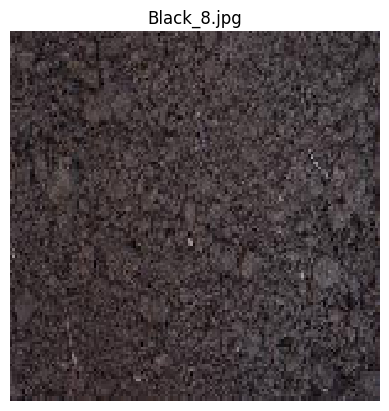

1/1 [==============================] - 0s 279ms/step
Predicted Soil Type: Black Soil
Recommended Crops: ['Wheat', 'Virginia', 'Jowar', 'Millets', 'Linseed', 'Castor', 'Sunflower']
Recommended Fertilizer: 10-26-26


C:\Users\abhis\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [64]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os 
import requests
import numpy as np
import joblib
from geopy.geocoders import Nominatim

# Define a single image path
image_path = 'C:/Users/abhis/Downloads/crop7/Dataset/test/Black Soil/Black_8.jpg'

# Load the image using keras.preprocessing.image.load_img
img = image.load_img(image_path, target_size=(150, 150))

# Display the image using matplotlib
plt.imshow(img, interpolation='nearest')
plt.axis("off")
plt.title(os.path.basename(image_path))
plt.show()

# Preprocess the image
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

# Load the crop recommendation model
crop_recommendation_model = joblib.load('crop_recommendation_model.pkl')  # Use .h5 or .keras file format

# Predict the class of the image
a = crop_recommendation_model.predict(img_array)
indices = a.argmax()

# Define soil types and corresponding crop recommendations
soil_labels = ["Alluvial", "Black Soil", "Clay soil", "Red soil"]
soil = {
    "Alluvial": ["Rice", "SugarCane", "Maize", "Cotton", "Soyabean", "Jute"],
    "Black Soil": ["Wheat", "Virginia", "Jowar", "Millets", "Linseed", "Castor", "Sunflower"],
    "Clay soil": ["Rice", "Lettuce", "Chard", "Broccoli", "Cabbage", "Snap Beans"],
    "Red soil": ["Cotton", "Pulses", "Millets", "OilSeeds", "Potatoes"],
}

# Get the predicted soil type and corresponding crops
predicted_soil_type = soil_labels[indices]
crop_list = [crop.split(" ", 1)[-1] for crop in soil[predicted_soil_type]]  # Strip the first word

print(f"Predicted Soil Type: {predicted_soil_type}")
print("Recommended Crops:", crop_list)

# Step 4: Use the first crop in the list for the fertilizer recommendation system
selected_crop = crop_list[0]

# Step 5: Weather and fertilizer recommendation logic
API_KEY = '0f91ae25d6064ac3a1e182218242908'
BASE_URL = 'http://api.weatherapi.com/v1/current.json'

# Function to get current location (latitude and longitude)
def get_current_location():
    response = requests.get('https://ipinfo.io')
    if response.status_code == 200:
        data = response.json()
        loc = data['loc'].split(',')
        latitude = loc[0]
        longitude = loc[1]
        return latitude, longitude
    else:
        print("Unable to get location.")
        return None, None

# Function to get weather data based on coordinates
def get_weather(latitude, longitude):
    request_url = f"{BASE_URL}?key={API_KEY}&q={latitude},{longitude}"
    response = requests.get(request_url)
    if response.status_code == 200:
        weather_data = response.json()
        temperature = weather_data['current']['temp_c']
        humidity = weather_data['current']['humidity']
        moisture = weather_data['current']['precip_mm']
        return temperature, humidity, moisture
    else:
        print(f"Failed to retrieve weather data. Status code: {response.status_code}")
        return None, None, None

def main():
    # Get current location
    latitude, longitude = get_current_location()
    if not (latitude and longitude):
        return
    
    # Get weather data
    temperature, humidity, moisture = get_weather(latitude, longitude)
    if not (temperature and humidity and moisture):
        return

    # Load the fertilizer recommendation model
    recommendation_model = joblib.load('fertilizer_recommendation_model.pkl')
    
    # Load label encoders
    label_encoder_soil = joblib.load('label_encoder_soil.pkl')
    label_encoder_crop = joblib.load('label_encoder_crop.pkl')
    
    # Example feature values with updated crop type and weather data
    image_features = {
        'Temperature': temperature,
        'Humidity': humidity,
        'Moisture': moisture,
        'Soil Type': predicted_soil_type,
        'Crop Type': selected_crop,
        'Nitrogen': 0,
        'Potassium': 12,
        'Phosphorous': 14
    }
    
    # Encode soil type and crop type
    soil_type_encoded = label_encoder_soil.transform([image_features['Soil Type']])[0]
    crop_type_encoded = label_encoder_crop.transform([image_features['Crop Type']])[0]
    
    # Prepare feature vector for prediction
    new_features = np.array([[image_features['Temperature'], image_features['Humidity'],
                              image_features['Moisture'], soil_type_encoded, crop_type_encoded,
                              image_features['Nitrogen'], image_features['Potassium'], image_features['Phosphorous']]])
    
    # Predict the fertilizer
    recommended_fertilizer = recommendation_model.predict(new_features)
    print(f"Recommended Fertilizer: {recommended_fertilizer[0]}")

if __name__ == "__main__":
    main()


In [65]:
import numpy as np
import joblib
from keras.preprocessing import image
from keras.models import load_model

# Load the crop recommendation model
crop_recommendation_model = joblib.load('crop_recommendation_model.pkl')

# Define the class labels (ensure this matches the order used during training)
class_labels = ['Alluvial Soil', 'Black Soil', 'Clay Soil', 'Red Soil']

# Preprocess the input image
input_shape = crop_recommendation_model.input_shape  # Get model's input shape
img = image.load_img('C:/Users/abhis/Downloads/crop7/Dataset/test/Clay soil/Clay_20.jpg', target_size=input_shape[1:3])
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize the image

# Predict the soil type
predicted_label = crop_recommendation_model.predict(img_array)

# Print the raw prediction output for debugging
print(f"Raw model prediction output: {predicted_label}")

# Get the class index with the highest probability
predicted_class_index = np.argmax(predicted_label)
print(f"Predicted class index: {predicted_class_index}")

# Get the predicted soil type
predicted_soil_type = class_labels[predicted_class_index]
print(f"Predicted soil type: {predicted_soil_type}")

# Define the soil dictionary
soil_dict = {
    "Alluvial Soil": "This soil is suitable for crops: Rice, SugarCane, Maize, Cotton, Soyabean, Jute",
    "Black Soil": "This soil is suitable for crops: Wheat, Virginia, Jowar, Millets, Linseed, Castor, Sunflower",
    "Clay Soil": "This soil is suitable for crops: Rice, Lettuce, Chard, Broccoli, Cabbage, Snap Beans",
    "Red Soil": "This soil is suitable for crops: Cotton, Pulses, Millets, OilSeeds, Potatoes",
}

# Check if the predicted label is in the soil dictionary and print the information
if predicted_soil_type in soil_dict:
    print("Soil Type:", predicted_soil_type)
    print(soil_dict[predicted_soil_type])
else:
    print("Predicted label not found in soil dictionary")

# Further steps with the fertilizer recommendation model...

1/1 [==============================] - 0s 264ms/step
Raw model prediction output: [[0.05037543 0.02072749 0.9153812  0.01351592]]
Predicted class index: 2
Predicted soil type: Clay Soil
Soil Type: Clay Soil
This soil is suitable for crops: Rice, Lettuce, Chard, Broccoli, Cabbage, Snap Beans


In [8]:
from sklearn.preprocessing import LabelEncoder

# Assume you have the full list of soil types and crop types
all_soil_types = ["Alluvial Soil", "Black Soil", "Clay Soil", "Red Soil"]
all_crop_types = ["Rice", "SugarCane", "Maize", "Cotton", "Soyabean", "Jute", 
                  "Wheat", "Virginia", "Jowar", "Millets", "Linseed", "Castor", "Sunflower", 
                  "Lettuce", "Chard", "Broccoli", "Cabbage", "Snap Beans", 
                  "Pulses", "OilSeeds", "Potatoes"]

# Train the label encoders
label_encoder_soil = LabelEncoder()
label_encoder_soil.fit(all_soil_types)

label_encoder_crop = LabelEncoder()
label_encoder_crop.fit(all_crop_types)

# Save the encoders for later use
joblib.dump(label_encoder_soil, 'label_encoder_soil.pkl')
joblib.dump(label_encoder_crop, 'label_encoder_crop.pkl')


['label_encoder_crop.pkl']

In [163]:
# Standardize label formatting
standardized_soil_type = predicted_soil_type.strip().lower()
standardized_crop_type = selected_crop.strip().lower()


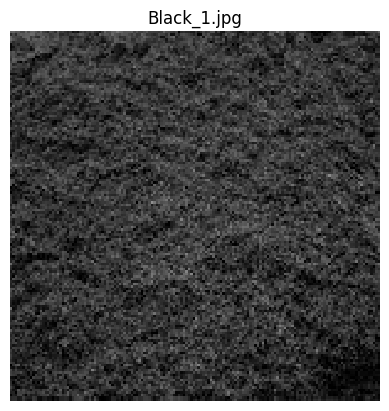

1/1 [==============================] - 0s 301ms/step
Predicted Soil Type: Black Soil
Recommended Crops: ['Wheat', 'Virginia', 'Jowar', 'Millets', 'Linseed', 'Castor', 'Sunflower']
Recommended Fertilizer: Urea


C:\Users\abhis\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [66]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os 
import requests
import numpy as np
import joblib
from geopy.geocoders import Nominatim

# Define a single image path
image_path = 'C:/Users/abhis/Downloads/crop7/Dataset/test/Black Soil/Black_1.jpg'

# Load the image using keras.preprocessing.image.load_img
img = image.load_img(image_path, target_size=(150, 150))

# Display the image using matplotlib
plt.imshow(img, interpolation='nearest')
plt.axis("off")
plt.title(os.path.basename(image_path))
plt.show()

# Preprocess the image
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

# Load the crop recommendation model
crop_recommendation_model = joblib.load('crop_recommendation_model.pkl')  # Use .h5 or .keras file format

# Predict the class of the image
a = crop_recommendation_model.predict(img_array)
indices = a.argmax()

# Define soil types and corresponding crop recommendations 
# Define soil types and corresponding crop recommendations 
soil_labels = ["Alluvial Soil", "Black Soil", "Clay Soil", "Red Soil"]
soil = {
    "Alluvial Soil": ["Rice", "SugarCane", "Maize", "Cotton", "Soyabean", "Jute"],
    "Black Soil": ["Wheat", "Virginia", "Jowar", "Millets", "Linseed", "Castor", "Sunflower"],
    "Clay Soil": ["Rice", "Lettuce", "Chard", "Broccoli", "Cabbage", "Snap Beans"],
    "Red Soil": ["Cotton", "Pulses", "Millets", "OilSeeds", "Potatoes"],
}


# Get the predicted soil type and corresponding crops
predicted_soil_type = soil_labels[indices]
crop_list = [crop.split(" ", 1)[-1] for crop in soil[predicted_soil_type]]  # Strip the first word

print(f"Predicted Soil Type: {predicted_soil_type}")
print("Recommended Crops:", crop_list)

# Step 4: Use the first crop in the list for the fertilizer recommendation system
selected_crop = crop_list[0]

# Step 5: Weather and fertilizer recommendation logic
API_KEY = '0f91ae25d6064ac3a1e182218242908'
BASE_URL = 'http://api.weatherapi.com/v1/current.json'

# Function to get current location (latitude and longitude)
def get_current_location():
    response = requests.get('https://ipinfo.io')
    if response.status_code == 200:
        data = response.json()
        loc = data['loc'].split(',')
        latitude = loc[0]
        longitude = loc[1]
        return latitude, longitude
    else:
        print("Unable to get location.")
        return None, None

# Function to get weather data based on coordinates
def get_weather(latitude, longitude):
    request_url = f"{BASE_URL}?key={API_KEY}&q={latitude},{longitude}"
    response = requests.get(request_url)
    if response.status_code == 200:
        weather_data = response.json()
        temperature = weather_data['current']['temp_c']
        humidity = weather_data['current']['humidity']
        moisture = weather_data['current']['precip_mm']
        return temperature, humidity, moisture
    else:
        print(f"Failed to retrieve weather data. Status code: {response.status_code}")
        return None, None, None

def main():
    # Get current location
    latitude, longitude = get_current_location()
    if not (latitude and longitude):
        return
    
    # Get weather data
    temperature, humidity, moisture = get_weather(latitude, longitude)
    if not (temperature and humidity and moisture):
        return

    # Load the fertilizer recommendation model
    recommendation_model = joblib.load('fertilizer_recommendation_model.pkl')
    
    # Load label encoders
    label_encoder_soil = joblib.load('label_encoder_soil.pkl')
    label_encoder_crop = joblib.load('label_encoder_crop.pkl')
    
    # Example feature values with updated crop type and weather data
    image_features = {
        'Temperature': temperature,
        'Humidity': humidity,
        'Moisture': moisture,
        'Soil Type': predicted_soil_type,
        'Crop Type': selected_crop,
        'Nitrogen': 31,
        'Potassium': 0,
        'Phosphorous': 14
    }
    
    # Encode soil type and crop type
    soil_type_encoded = label_encoder_soil.transform([image_features['Soil Type']])[0]
    crop_type_encoded = label_encoder_crop.transform([image_features['Crop Type']])[0]
    
    # Prepare feature vector for prediction
    new_features = np.array([[image_features['Temperature'], image_features['Humidity'],
                              image_features['Moisture'], soil_type_encoded, crop_type_encoded,
                              image_features['Nitrogen'], image_features['Potassium'], image_features['Phosphorous']]])
    
    # Predict the fertilizer
    recommended_fertilizer = recommendation_model.predict(new_features)
    print(f"Recommended Fertilizer: {recommended_fertilizer[0]}")

if __name__ == "__main__":
    main()


In [2]:
import joblib
joblib.dump(model, 'crop_recommendation_model.pkl')




NameError: name 'model' is not defined

In [4]:
from tensorflow.keras.models import save_model

# Assuming 'model' is your Keras/TensorFlow model
save_model(model, 'crop_recommendation_model.h5')


NameError: name 'model' is not defined

In [3]:
import joblib

crop_recommendation_model = joblib.load('crop_recommendation_model.pkl')


ModuleNotFoundError: No module named 'keras.src.models.sequential'

In [11]:
import tensorflow as tf

# Load your Keras model
model = tf.keras.models.load_model('C:/Users/abhis/Downloads/soil/fertilizer_recommendation_model.h5')

# Save it as TensorFlow SavedModel format
tf.saved_model.save(model, 'C:/Users/abhis/Downloads/soil/saved_model')

INFO:tensorflow:Assets written to: C:/Users/abhis/Downloads/soil/saved_model\assets


INFO:tensorflow:Assets written to: C:/Users/abhis/Downloads/soil/saved_model\assets


In [12]:
!pip install tensorflowjs


  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.



  Using cached tensorflowjs-4.20.0-py3-none-any.whl.metadata (3.2 kB)
  Using cached flax-0.9.0-py3-none-any.whl.metadata (11 kB)
  Using cached importlib_resources-6.4.4-py3-none-any.whl.metadata (4.0 kB)
  Using cached jax-0.4.31-py3-none-any.whl.metadata (22 kB)
  Using cached tf_keras-2.17.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached tensorflow_decision_forests-1.8.1.tar.gz (15.2 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached tensorflow_hub-0.16.1-py2.py3-none-any.whl.metadata (1.3 kB)
  Using cached packaging-23.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached optax-0.2.3-py3-none-any.whl.metadata (8.3 kB)
  Using cached orbax_checkpoint-0.6.1-py3-none-any.whl.metadata (1.8 kB)
INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
  Using cached toolz-0.12.1-py3-none-any.whl.metadata (5.1 kB)
   ------------

In [13]:
import tensorflow as tf
import tensorflowjs as tfjs

# Load your Keras model
model = tf.keras.models.load_model('C:/Users/abhis/Downloads/soil/fertilizer_recommendation_model.h5')

# Convert the model to TensorFlow.js format
tfjs.converters.save_keras_model(model, 'C:/Users/abhis/Downloads')


ImportError: cannot import name 'disable_resource_variables' from 'tensorflow.python.ops.variable_scope' (c:\Users\abhis\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\ops\variable_scope.py)

In [14]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)


In [17]:
model.save_weights("C:/Users/abhis/Downloads/soil/fertilizer_recommendation_model.weights.h5")


In [5]:
from tensorflow.keras.models import load_model
crop_recommendation_model = load_model('crop_recommendation_model.h5')


OSError: No file or directory found at crop_recommendation_model.h5